In [1]:
# Import library
import pandas  as pd                    # For Data manipulation and reading excel or csv files etc.
import numpy as np                     # Data manipulation
import matplotlib.pyplot as plt         # Visualization
import seaborn as sns                   # Visualization
from sklearn.preprocessing import LabelEncoder   # for encoding categorical variables 

In [3]:
# read or import the csv file from a local folder (in this case the file saved under documents folder)
# pandas (pd) saves it as a dataframe file
data = pd.read_excel(r"C:/Users/mncedisi.mncwabe/Downloads/data2.xlsx")

In [4]:
# view snapshot of the imported data
data.head()

,warehouse,city,Order_ID,Rider_ID,Picking_queue_time,Picking_time,Packing_queue_time,Packing_time,Order_assigning_time,Rider_picking_time,Commute_time,Arrival_time,commute_eta
0,Karachi EW7,Karachi,1832022,7755,0.120693,12.611369,0.273552,5.425131,2.980597,6.374956,1.820027,29.636286,14.733333
1,Karachi EW7,Karachi,1832164,16175,0.768998,0.192980,0.359521,0.466192,0.269287,6.762843,20.748160,25.887261,27.183333
2,Karachi EW7,Karachi,1832154,16175,0.078558,1.233138,0.435372,0.535498,1.290811,6.762843,31.119638,41.456647,12.100000
3,Karachi EW7,Karachi,1832114,8772,1.223241,0.519543,0.592719,0.331525,4.592558,3.740459,4.912440,15.934969,16.583333
4,Karachi EW7,Karachi,1831673,8772,12.708774,16.294645,5.256120,9.919570,9.345689,3.740459,12.004437,69.336856,11.883333


In [ ]:
# the column "charges" is the target /dependent variable(variable to be predicted) 
# based on someone's age,sex,bmi,children, whether they smoke or not, number of children they have 
# and in which region they are from

# - the target variable(charges) is a continous/numerical variable so this is a regression problem, so linear regression 
# (or any kind of Machine learning regression model) can be used

In [5]:
# view shape (how many columns(7) and rows(1338))
data.shape

(6703, 13)

In [6]:
# check percentage of missing values in the data 

# - Linear regression (and most machine learning models) cannot be fitted if there are any missing values on the data
# so you need to handle missing values first before building a model

data.isnull().sum().sort_values(ascending = False)/len(data)*100 

warehouse               0.0
city                    0.0
Order_ID                0.0
Rider_ID                0.0
Picking_queue_time      0.0
Picking_time            0.0
Packing_queue_time      0.0
Packing_time            0.0
Order_assigning_time    0.0
Rider_picking_time      0.0
Commute_time            0.0
Arrival_time            0.0
commute_eta             0.0
dtype: float64

### EDA (Exploratory Data Analysis)

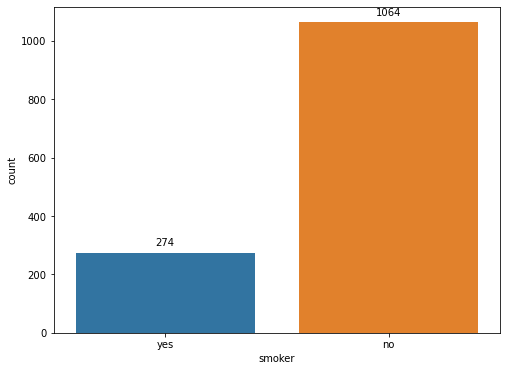

In [10]:
# to get descriptive stats for categorical columns (region, children, smoker), the folling distribution plots can be used

plt.figure(figsize = (8,6))
plot = sns.countplot(x = 'smoker',data = data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# the plot shows you how many smokers(yes) and non-smokers(no) in the data

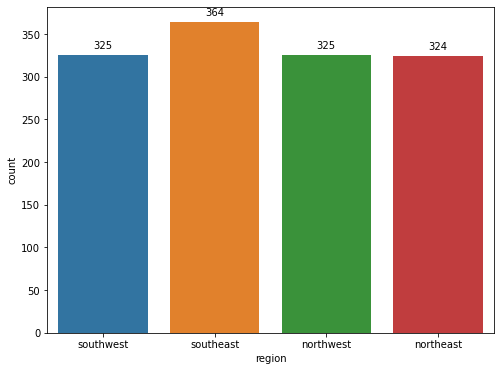

In [11]:
plt.figure(figsize = (8,6))
plot = sns.countplot(x = 'region',data = data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# how many people are from each region

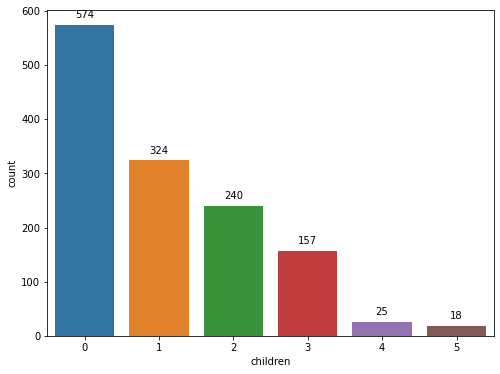

In [12]:
plt.figure(figsize = (8,6))
plot = sns.countplot(x = 'children',data = data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# from the plot below most people in the data do not have children

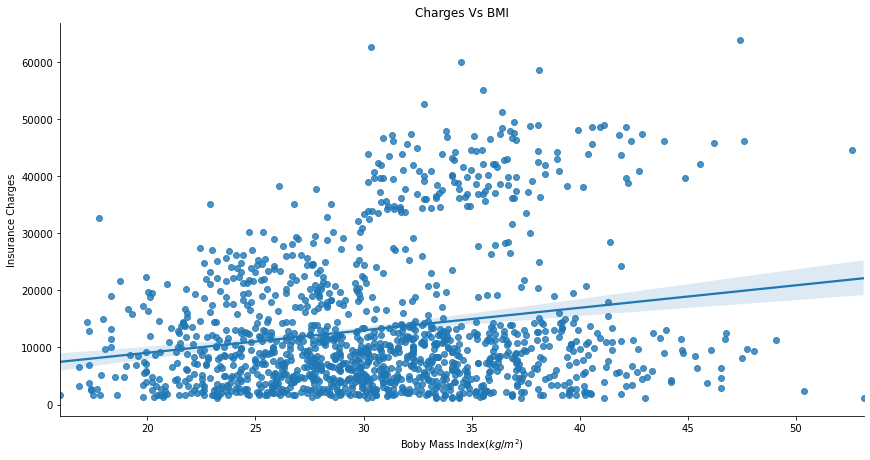

In [15]:
# check relationship between bmi and charges using regression line (sames as the scatterplot)

sns.lmplot(x='bmi',y='charges',data=data,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$')
plt.ylabel('Insurance Charges')
plt.title('Charges Vs BMI');

# from the plot it can be seen that bmi of a person has a positive relationship with how much they get charged 
# by the insurance company. 
# Higher bmi results to higher medical bill charges (probably because a person with high bmi has health risks)

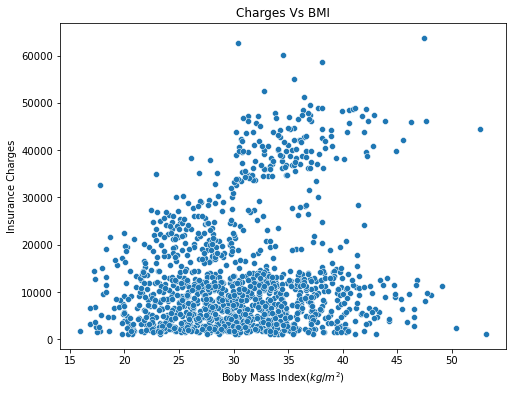

In [19]:
# Scatterplot (exactly the same visual as the linear regression plot above)
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi',y='charges',data=data)
plt.xlabel('Boby Mass Index$(kg/m^2)$')
plt.ylabel('Insurance Charges')
plt.title('Charges Vs BMI');


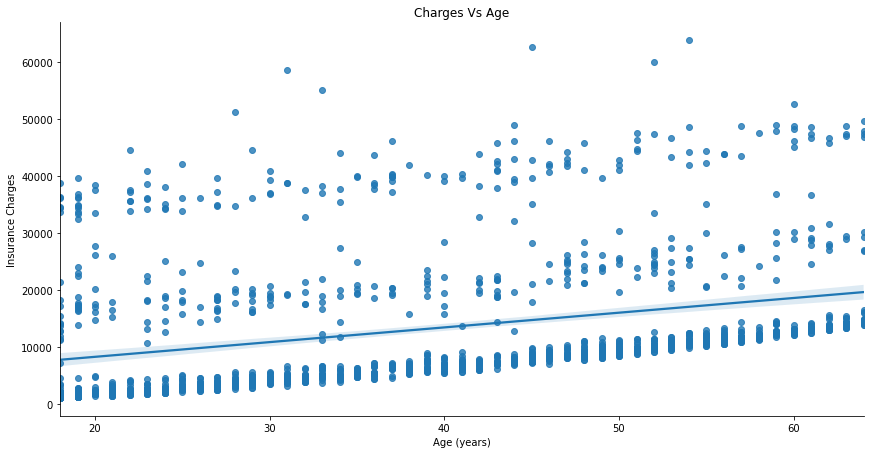

In [22]:
# Age vs charges
sns.lmplot(x='age',y='charges',data=data,aspect=2,height=6)
plt.xlabel('Age (years)')
plt.ylabel('Insurance Charges')
plt.title('Charges Vs Age');

# seems like old people get charged more than young people

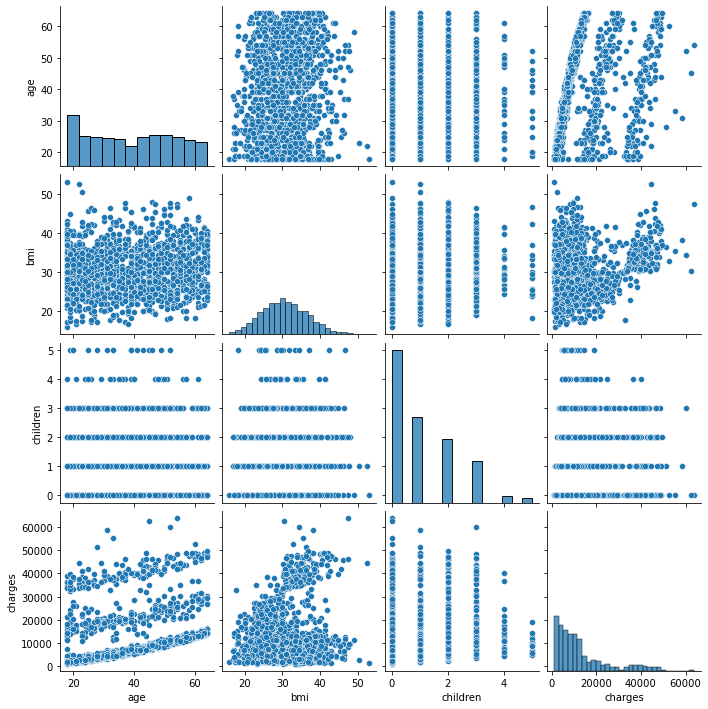

In [23]:
# paiplot can also be used to to plot scatterplots and observe a relationship of the variables among each other
# the diagonals just shows a distribution of the variable
sns.pairplot(data)

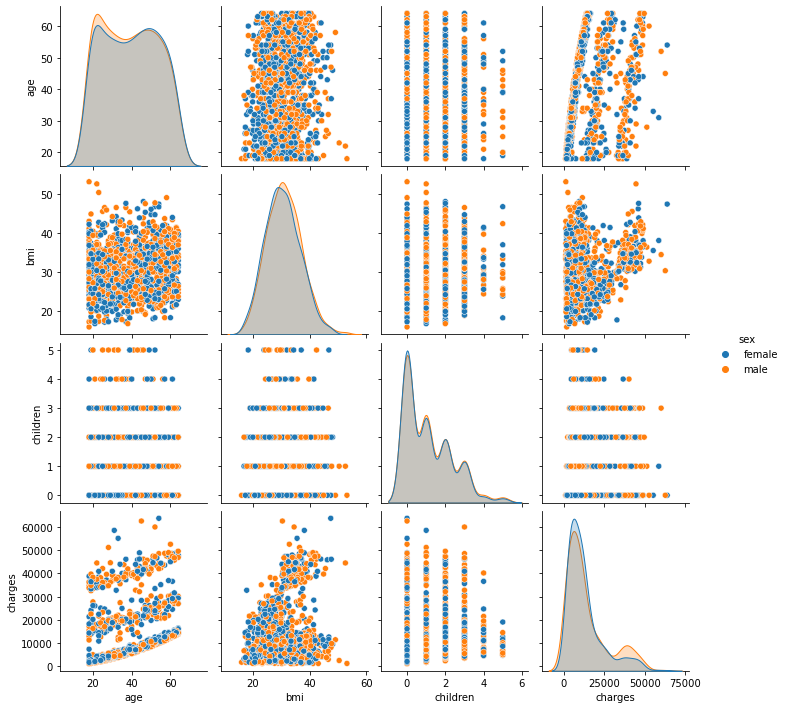

In [31]:
sns.pairplot(data, hue = 'sex')

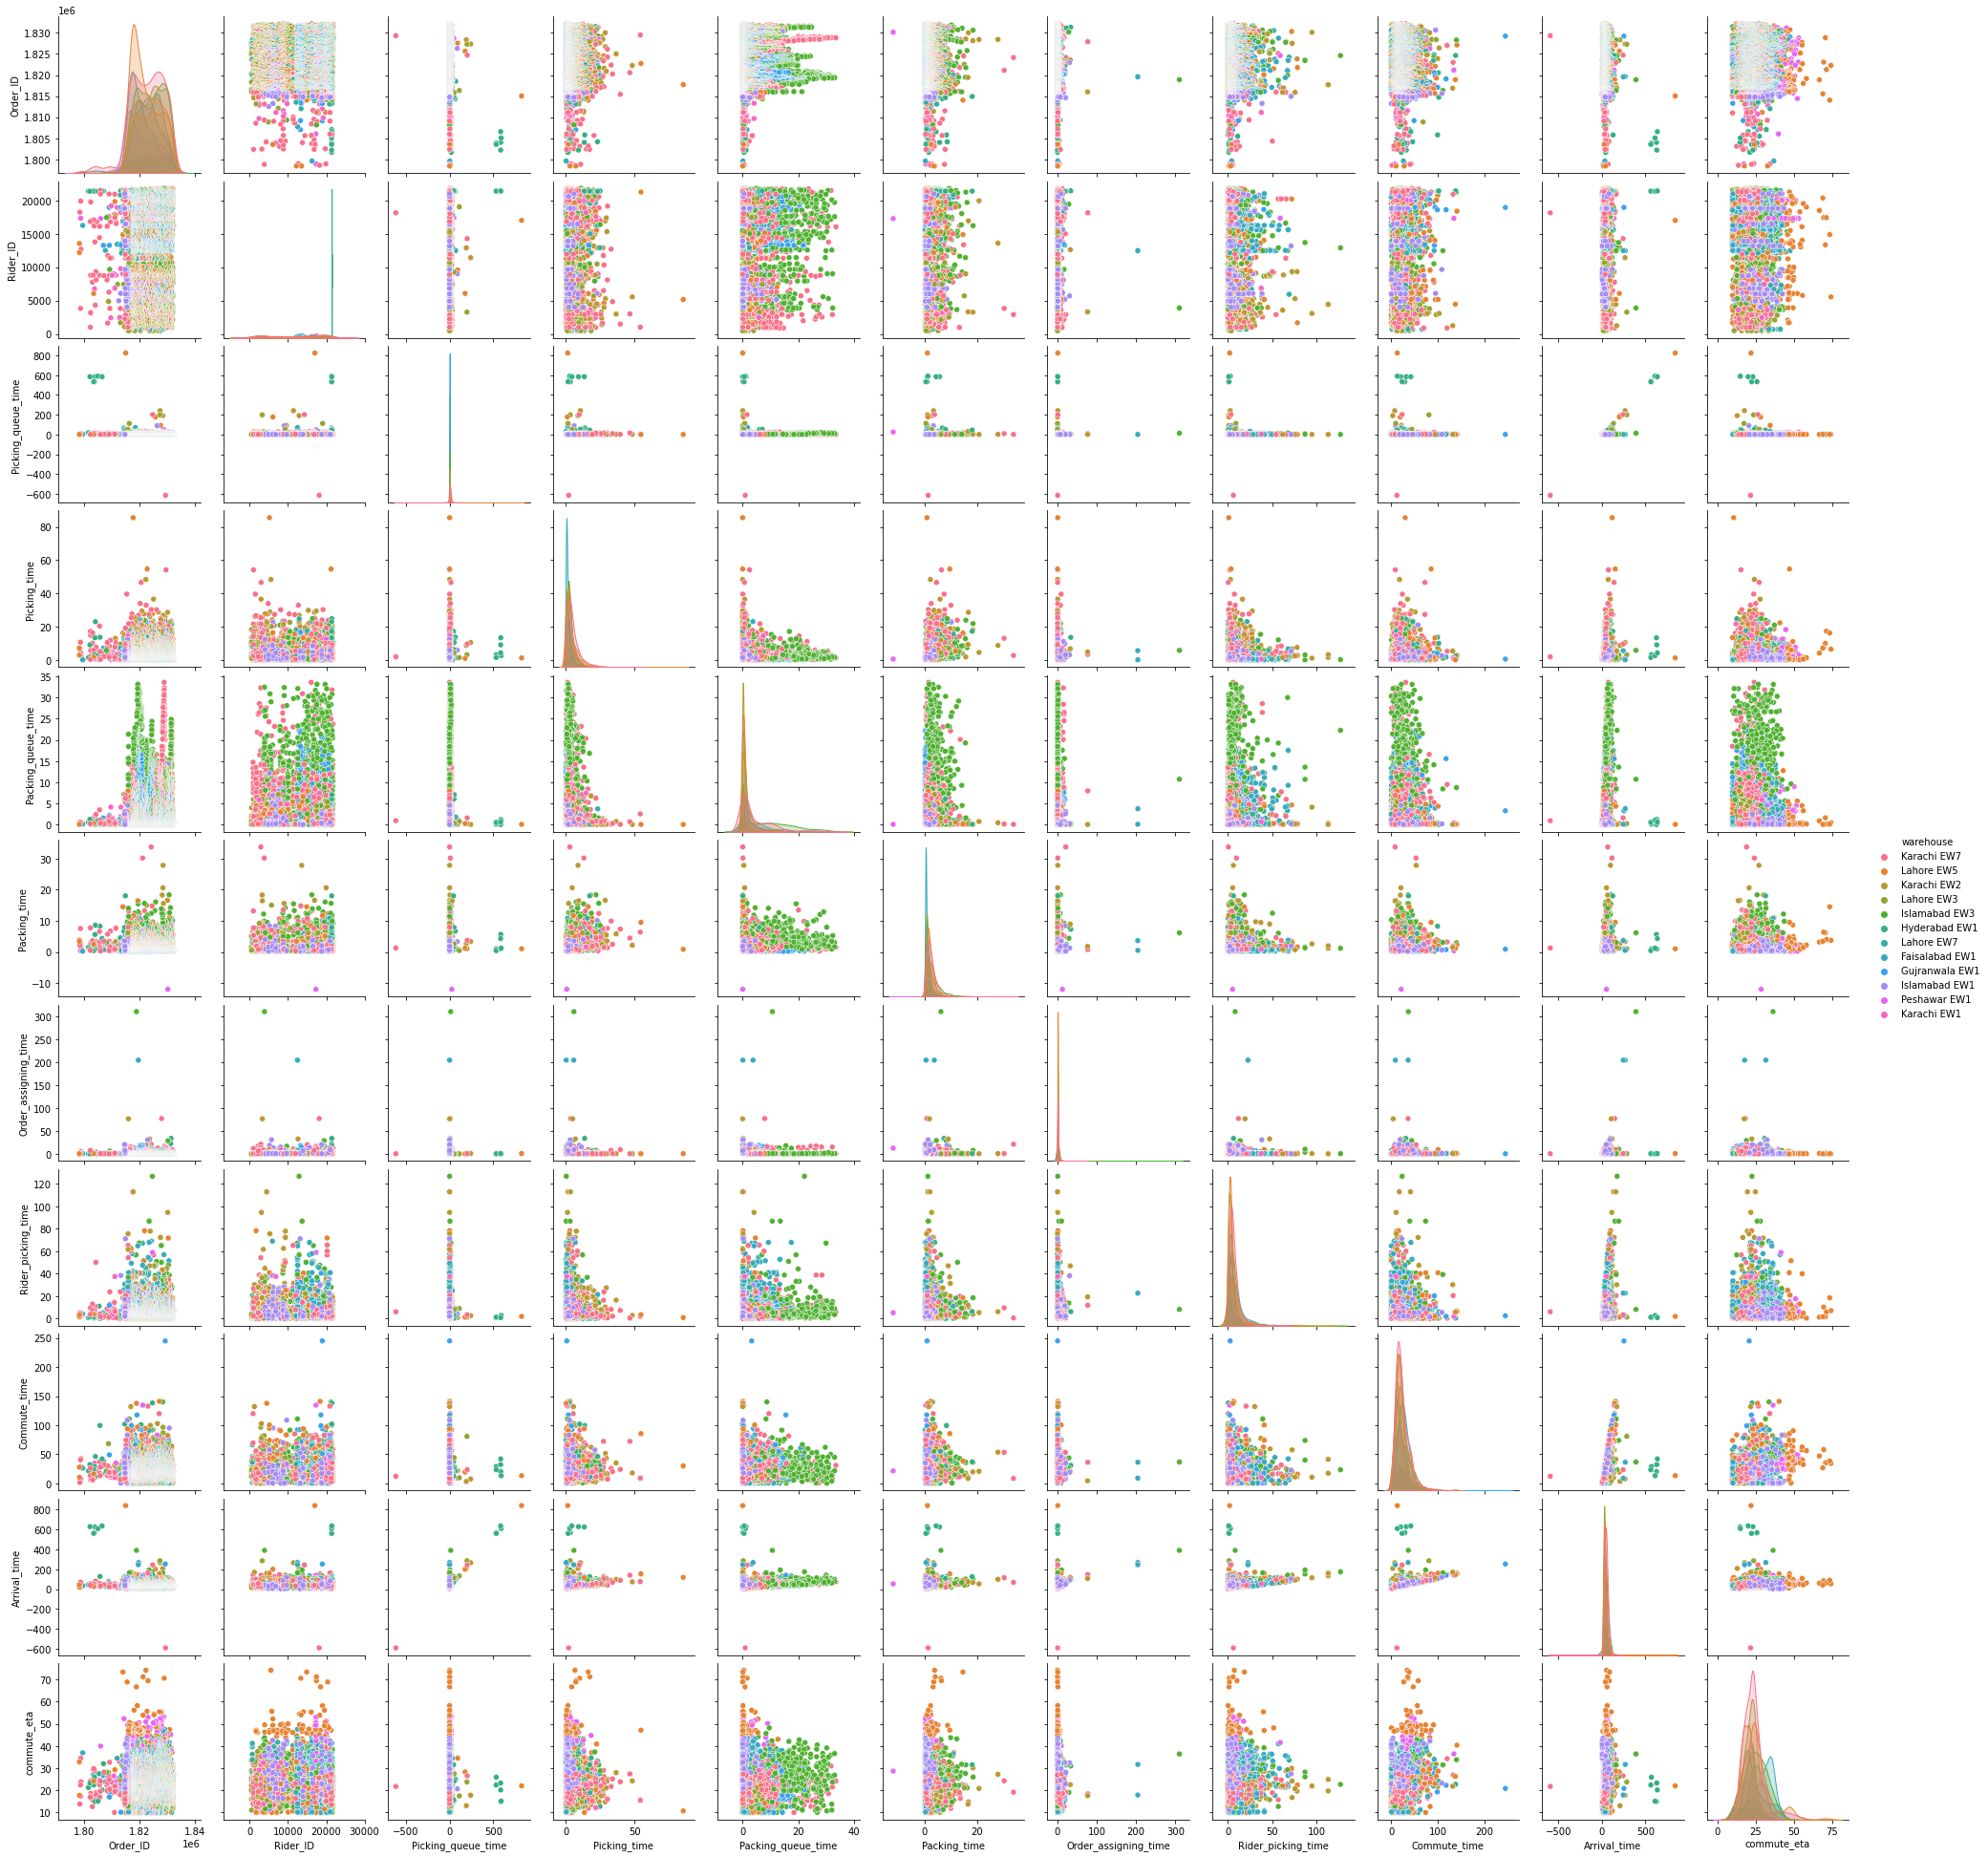

In [8]:
sns.pairplot(data, hue = 'warehouse')

In [10]:
data = data.drop(['Order_ID','Rider_ID','commute_eta'],axis=1)

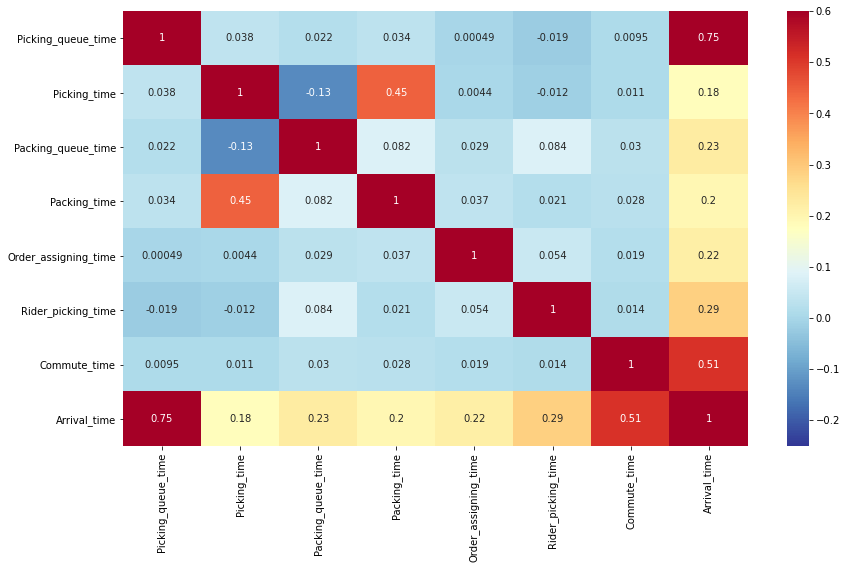

In [11]:
# correlation heatmap
# this shows a correlation between variables
# Most Machine learning models require input variables (independent variables) not to have high correlation among each other
# as this would impact accuracy of the predictive model
# if two independent variables have >0.7 correlation,then one can be removed and only one of them be used in training the model

plt.figure(figsize = (14,8))

sns.heatmap(data.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6);

# from the heatmap below, no independent variables are highly correlated, so all the variables can be used to train the model
# the diagonals (Strong reds or 1) is just a correlation of the variable against itself

C:\Users\mncedisi.mncwabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mncedisi.mncwabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


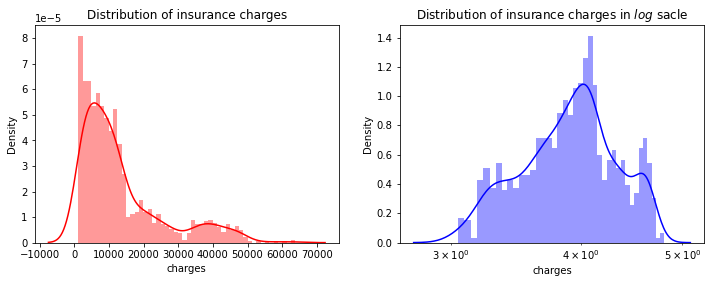

In [33]:
# distribution of variables

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(data['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

# log transfation applied to normalize it
ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

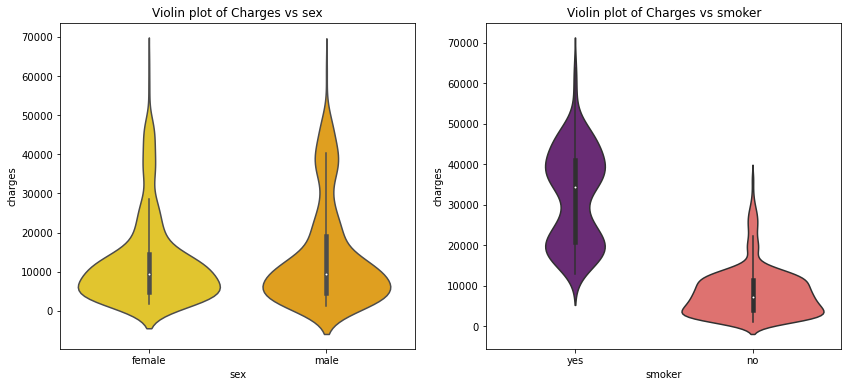

In [35]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data = data,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data = data,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');


# From left plot the insurance charge for male and female is approximatley in same range,
# it is average around 5000 bucks. 
# From the right plot the insurance charge for smokers is much wide range
# compared to non-smokers, the average charges for non-smokers is approximately 5000 bucks. 
# For smokers the minimum insurance charge is itself 5000 bucks.

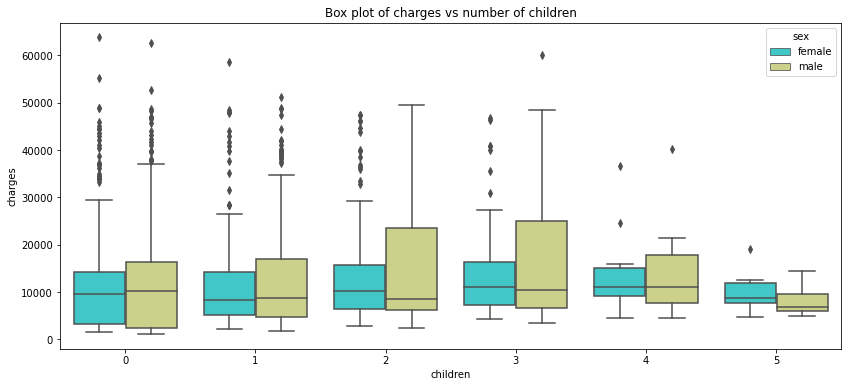

In [37]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=data,palette='rainbow')
plt.title('Box plot of charges vs number of children');

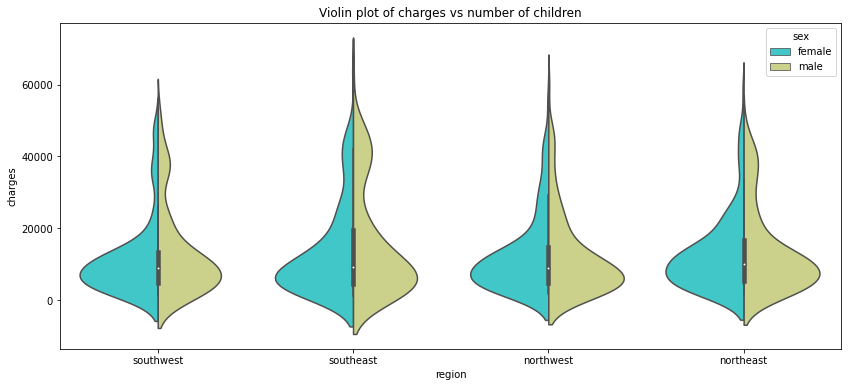

In [39]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data = data,palette='rainbow',split=True)
plt.title('Violin plot of charges vs number of children');

# the average charges for males and females is approximately the same for all regions

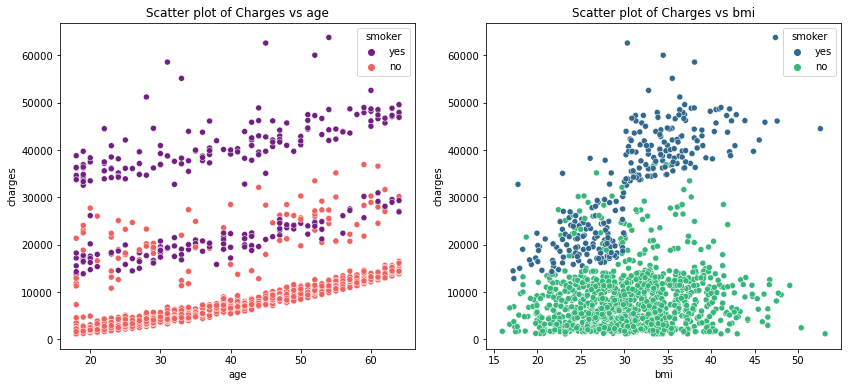

In [40]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=data,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=data,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

# From left plot the minimum age a person is insured is 18 years. There is slabs in policy most of 
# non smokers take  1st  and  2nd  slab, for smokers the policy starts at  2nd  and  3rd  slab.

# Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. 
# The minimum bmi is 16 kg/m2  and maximum upto 54 kg/m2

### Data Preprocessing
##### Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to a number before training the model.

Encoding using:
- Label Encoding
- One hot encoding
- Dummy variable trap

In [41]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df = pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [42]:
# view the encoded data
# the data is now clean and ready for modelling
df.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


## Machine Learning

In [44]:
# This problem is a Regression problem so we'll use Regresion models not Classification models
 
from sklearn.metrics import mean_squared_error,mean_absolute_error   
from sklearn.ensemble import RandomForestRegressor                   # Random forest regressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression                    # Linear regression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split  # for splitting the data to train and test

In [45]:
X = df.drop('charges',axis=1)          # Independet variables
y = df['charges']                     # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=23)  

# dat is splitted to 70% train and 30% test
# train set is used to train the model and test set is used to evaluate'
# the performance of the model on unseen data (data that it was not trained on) 
# so that we know the model is able to generalize and predict the outcome of the "future" based on what it has learned

In [46]:
# check size of the train and test sets
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(936, 12) (936,)
(402, 12) (402,)


In [47]:
# Fit Linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)                            # train model
print('accurary(%):',lin_reg.score(X_test,y_test)*100)    # score it/ predict the outcome of the test set

accurary(%): 73.05284299807451


In [52]:
# The parameters for linear regression model

# add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]


theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})


lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-11738.954855,-11738.954855
1,theta_1,age,246.272603,246.272603
2,theta_2,bmi,347.988088,347.988088
3,theta_3,OHE_male,-127.955178,-127.955178
4,theta_4,OHE_1,321.846883,321.846883
5,theta_5,OHE_2,1476.269020,1476.269020
6,theta_6,OHE_3,1198.109156,1198.109156
7,theta_7,OHE_4,3767.409106,3767.409106
8,theta_8,OHE_5,1964.399228,1964.399228
9,theta_9,OHE_yes,24252.366362,24252.366362


#### Evaluate the model

In [53]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  35152074.799860336
R square obtain for normal equation method is : 0.7305284299807453


In [54]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  35152074.79986035
R square obtain for scikit learn library is : 0.7305284299807451


The model returns R2 value (co-efficient of determination) of 73.05%, so it fits test set very well, but the performance can still be imporved by diffirent techniques or training a different regression moden and compare the performances

C:\Users\mncedisi.mncwabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mncedisi.mncwabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


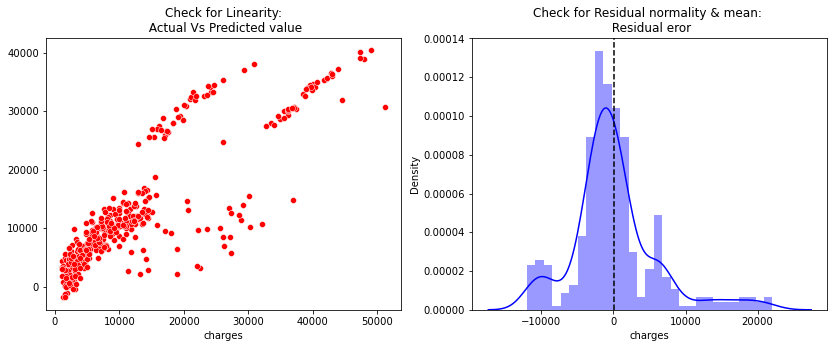

In [55]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

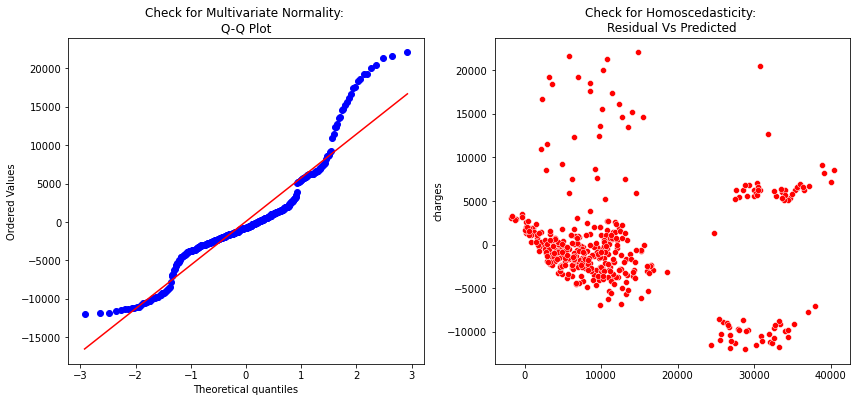

In [56]:
# Check for Multivariate Normality
# Quantile-Quantile (QQ-plot) plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [57]:
# Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

3.7109666148772043

##### The assimptions of a  linear regression is as follows:

- In our model the actual vs predicted plot is curve so linear assumption fails
- The residual mean is zero and residual error plot right skewed
- Q-Q plot shows as value log value greater than 1.5 trends to increase
- The plot exhibits heteroscedastic, error will increase after certian point.
- Variance inflation factor value is less than 5, so no multicollearity.

#### -------------------------------------------------------------------------------- End -----------------------------------------------------------------------------------